#Introduction to Proximity Clustering

##By the End of This Lesson You Will
1. Be able to describe in your own words what proximity Clustering is and what DBSCAN does.
2. Be able to describe verbally how the DBSCAN algorithm works.
3. Be able to identify basic circumstances where DBSCAN (or other proximity clustering algorithms) would be used

##Proximity Clustering: A basic introduction

Proximity clustering is less of an algorithm and more of an entire field, worthy of a 4 week survey.  It's more important that you understand why it exists and how to understand it. Since the publication of DBSCAN, something like 15 established upgraded versions of the original algorithm exist, i.e. AUTODBSCAN, VDBSCAN, PDBSCAN, DENCLUE, DBSCAN-DLP, GDBSCAN, OPTICS, and so on. Maybe 1000+ other publications have attempted improvements. Research on these algorithms continues at a rapid pace even today.

###Intuition:

The proximity methods **deliberately eliminate any presumption of underlying distributions.** This makes them more of a relative of K-means than probabilistic methods. However unlike K-means, proximity methods do not operate under the assumption of clean decision boundaries between clusters. The fact that K-means uses a Voronoi tesselation makes it prefer spherical distributions. Nonlinear boundaries 

Proximity clustering allows the **clustered data to describe the clusters**. It does this with two parameters, $\epsilon$ and minPoints. Unfortunately, it turns out that these end up being quite a restriction on the applicability of the method. 

###Hypothesis:



We can't make any assumptions about the clusters present, or their density. There could be no clusters, or many.
We describe the relationships in terms of *neighborhoods*.

![dbscan_neighborhood](./images/DBSCAN_neighborhood.png)


A neighborhood is defined as:

1. Having a minimum number of points, minPoints, within it.
2. Points that belong to that neighborhood are no more than $\epsilon$ distance apart.
3. If a point is within another point's neighborhood and that neighborhood is in a cluster, it is labeled as a member of that cluster.
4. Points that don't belong to a cluster are labeled as noise.

You will also see neighborhoods described in terms of their density. This is a reflection of the distance $\epsilon$ and the minPoints number of points that belong to the neighborhood. Any cluster's minimum density is defined in terms of these two parameters: 

$$\rho_{min} \propto \frac{minPoints}{\epsilon}$$

There are two types of relationships worth describing here: *density connectedness* and *density reachability*. If two points are density connected, they fall within each other's neighborhood. In the above diagram, the points *A* are density connected. The points *B* and *C* are density *reachable* but **not** density *connected* to points *A*. They will still be part of the *A* cluster, but these points will not become new centers of the same cluster themselves.

##QUIZ:  

What would happen if we added an additional groups of points within  to *B* but not *A*


###Cost:

There are no cost functions to minimize here. The algorithm proceeds until it can't change the labels on any of the points.

###Optimization:

There is no function to optimize but we can think of the clustering process as, where the process reaches an optimum when it can't change the labels on points any further.

There are numerous ways to define neighborhoods and distances. The most sophisticated algorithms carefully define neighborhoods into regions of similar density and provide multiple ways to define a cluster.  

Really, that's it!

###Reasoning: 

We are looking for ways to define clusters of unknown shape and size. 

##QUIZ:
Is there an upper limit on cluster density? How do you think variable density will affect the clustering process?

#DBSCAN

DBSCAN (Density Based Spatial Clustering Analysis with Noise) is the original version of the algorithm and the only one we expect you to learn in detail. As its acronym suggests, it is fast (SCAN) and capable of performing clustering on large databases (DB). One of the reasons it's so fast is because it's so simple. 


###Algorithm:

1. Pick an arbitrary point from the dataset. This is marked as a visited point. 
2. Count all points within $\epsilon$ of the original point. This is the neighborhood.
3. If there are more than minPoints points within a distance of $\epsilon$ from that point (including the original point itself), label them all as members of a new cluster.
4. For all points in the neighborhood of every point in the cluster, check to see if they also have minPoints within an $\epsilon$ neighborhood. Those that are, are also cluster members.
5. If a point has been visited by the algorithm and doesn't belong to a cluster yet, it is marked as noise.



###Demonstration:

Heres a great demonstration page for both DBSCAN and K-Means:

http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

I encourage you to work with this after class.



##Example: Comparison of GMM and DBSCAN with Scikit

1. Change the number of blobs
2. Noise on and off
3. Change standard deviation in blobs
4. What happens when we choose the wrong number of gaussians?
5. Increase/Decrease density of sampling and quantity of noise.

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


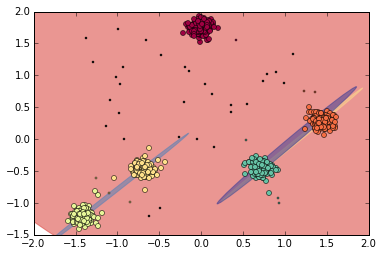

In [2]:
import numpy as np
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.mixture import GMM
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from numpy.random import random_sample
import matplotlib.pyplot as plt
import matplotlib as mpl
Ell = mpl.patches.Ellipse
##############################################################################
# Make ellipses

def make_ellipses(gmm, ax, colors):
    for n, mean in enumerate(gmm.means_):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = Ell(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=plt.cm.RdYlBu((5*n)**2))
        
        print ax
        
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

##############################################################################
# Generate sample data

#centers = [[2,0],[0,2],[-2,-2]]

centers = [[2,0],[0,2],[-2,-2],[-1, -1], [1, -1]]

#centers = [[1, 1], [-1, -1], [1, -1], [0, 0.5], [1, 0], [0,0]]

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.1, random_state=0)

X = np.concatenate((X,  4. * random_sample((50,2)) - 2. ), axis=0)
X = StandardScaler().fit_transform(X)
num_centers = len(centers)
##############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

##############################################################################
# Compute GMM

#We are assuming that we know how many clusters we have ... sort of.

gmm = GMM(n_components=num_centers, covariance_type='full', init_params='wc', n_iter=100)
gmm.fit(X)

##############################################################################
# Plot result
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=2)
make_ellipses(gmm, ax, colors)
#plt.title('Estimated number of clusters: %d' % n_clusters_)
